In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.corr

<bound method DataFrame.corr of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


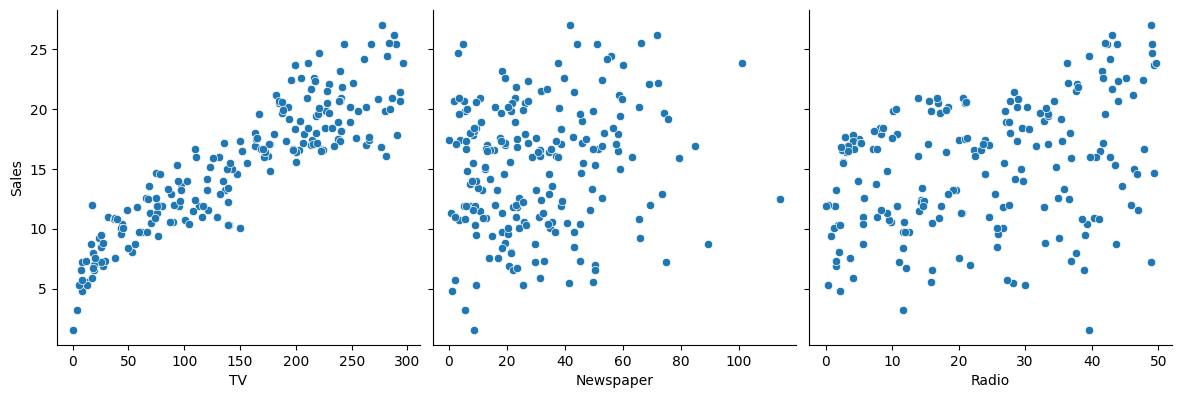

In [5]:
#let see how sales are related with other variables using ScatterPlot
sns.pairplot(data, x_vars=["TV","Newspaper","Radio"],y_vars="Sales",height=4,aspect=1,kind="scatter")
plt.show()

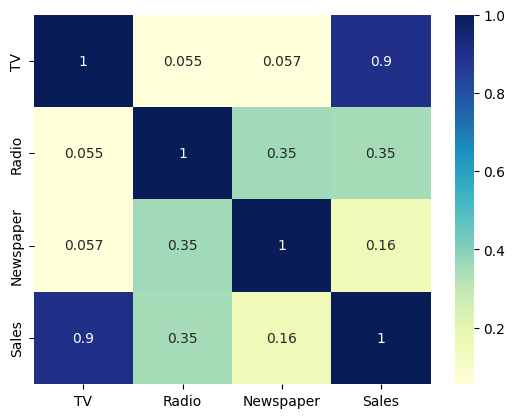

In [6]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [7]:
x=data["TV"]

In [8]:
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [9]:
y=data["Sales"]

In [10]:
x=data.iloc[:,1]

In [11]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [12]:
x

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: Radio, Length: 200, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
#y_predict=model.predict(x_test)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
'''import numpy as np
from sklearn.linear_model import LinearRegression

# Ensure x_train is a 2D array
x_train = np.array(x_train).reshape(-1, 1)

# Ensure y_train is a 1D array
y_train = np.ravel(y_train)

model = LinearRegression()
model.fit(x_train, y_train)'''

In [ ]:
#x_test = x_test.values.reshape(-1, 1)
#y_predict=model.predict(x_test)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
print(len(x_train), len(y_train))

In [ ]:
new_df=pd.DataFrame({"Actual":y_test,"Predict":y_predict})
new_df

In [ ]:
print(len(y_test), len(y_predict))

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Rmse",np.sqrt(mean_squared_error(y_test,y_predict)))
r_squared=r2_score(y_test,y_predict)
print("R2score",r_squared)
print("Training Score",model.score(x_train,y_train)*100)
print("Testing Score",model.score(x_test,y_test)*100)

In [ ]:
#To retrieve the intercept:
print("Intercept",model.intercept_)
#for retrieving the slope
print("Slope",model.coef_)

In [ ]:
plt.scatter(x_train,y_train,color="green")
plt.plot(x_test,y_predict,color="red")
plt.title("Sales")
plt.show()